# Lab 1

##  Fetch the data

The dataset housing.csv is already provided in the folder datasets and don´t have to be downloaded!

## Load the data using pandas and take a quick look at it using info () and describe ()

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('datasets/housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Create five income categories from median income attribute

I create 5 categories based on the min, max and median value of median_income:
- 1: <= 1.5
- 2: > 1.3 and <= 3.0
- 3: >3.0 and <= 4.5
- 4: > 4.5 and <= 6.0
- 5: > 6.0

In [5]:
df["income_category"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [6]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


## Compare stratified sampling based on income category with random sampling

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_random, test_random = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
train_stratified, test_stratified = train_test_split(df, test_size=0.2, stratify=df['income_category'], random_state=42)

In [10]:
# Compare density
print("Random Sampling Income Category Density:")
print(test_random['income_category'].value_counts(normalize=True))

print("Stratified Sampling Income Category Density:")
print(test_stratified['income_category'].value_counts(normalize=True))


Random Sampling Income Category Density:
income_category
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: proportion, dtype: float64
Stratified Sampling Income Category Density:
income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64


In [11]:
def income_cat_proportions(data):
    return data["income_category"].value_counts() / len(data)

In [12]:
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(test_stratified),
    "Random": income_cat_proportions(test_random),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [13]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_category,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


## Compute correlation

In [14]:
##create new df with only numeric values, as I got an error with the attribute ocean_proximity
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)

In [15]:
correlation_matrix = numeric_df.corr()

In [16]:
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [17]:
import matplotlib.pyplot as plt

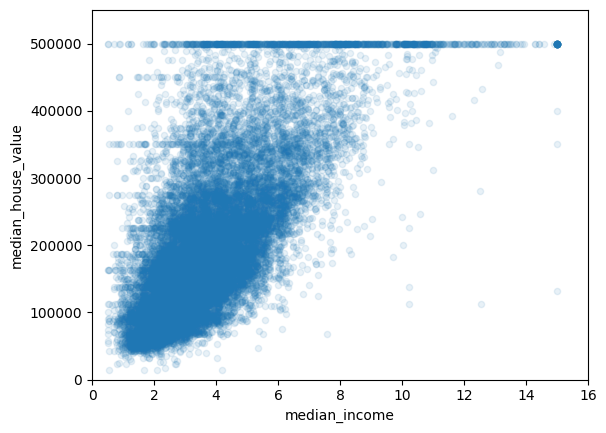

In [18]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

## Attribute Engineering

In [19]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [20]:
##create new df with only numeric values, as I got an error with the attribute ocean_proximity
numeric_df = df.select_dtypes(include=numerics)

In [21]:
corr_matrix = numeric_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [22]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


# Lab 2

## Prepare data

In [23]:
train_stratified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_category     16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [24]:
#drop the column income_category (was only used for stratified sampling)
test_stratified.drop("income_category", axis=1, inplace=True)
train_stratified.drop("income_category", axis=1, inplace=True)

In [25]:
#our new dataframe housing is the stratified train sample
housing = train_stratified.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_stratified["median_house_value"].copy()

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Data cleanup Pipeline

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [28]:
##define columns and the CombinedAttributesAdder
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices
    
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [29]:
##Pipeline for numeric columns
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [30]:
##get numeric columns
housing_num = housing.select_dtypes(include=[np.number])

In [31]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
#define full pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [33]:
## run full pipeline on housing data
housing_prepared = full_pipeline.fit_transform(housing)

In [34]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
housing_prepared.shape

(16512, 16)

## Experiment with Support Vector Machines (SVMs)

In [36]:
from sklearn.svm import SVR

In [37]:
###this section is commented, because it needs very long to run 
#from sklearn.model_selection import GridSearchCV

# param_grid = [
#         {'kernel': ['linear'], 'C': [100., 300., 1000., 3000., 10000., 30000.0]},
#         {'kernel': ['rbf'], 'C': [10., 30., 300., 1000.0],
#          'gamma': [ 0.1, 0.3, 1.0, 3.0]},
#     ]

# svm_reg = SVR()
# grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV] END .............................C=100.0, kernel=linear; total time=   4.5s
[CV] END .............................C=100.0, kernel=linear; total time=   4.4s
[CV] END .............................C=100.0, kernel=linear; total time=   4.2s
[CV] END .............................C=100.0, kernel=linear; total time=   4.4s
[CV] END .............................C=100.0, kernel=linear; total time=   4.4s
[CV] END .............................C=300.0, kernel=linear; total time=   4.4s
[CV] END .............................C=300.0, kernel=linear; total time=   4.4s
[CV] END .............................C=300.0, kernel=linear; total time=   4.3s
[CV] END .............................C=300.0, kernel=linear; total time=   4.4s
[CV] END .............................C=300.0, kernel=linear; total time=   4.4s
[CV] END ............................C=1000.0, kernel=linear; total time=   4.5s
[CV] END ............................C=1000.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [10.0, 30.0, 300.0, 1000.0],
                          'gamma': [0.1, 0.3, 1.0, 3.0], 'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
#remove the comment when you run the cell above
# best_svm_mse = grid_search.best_score_
# best_svm_rmse = np.sqrt(-best_svm_mse)
# print("Best RMSE of Support Vector Machine:", best_svm_rmse)

Best RMSE of Support Vector Machine: 70286.61835383571


In [52]:
#remove the comment when you run the cell above
# grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

## Train different models

### Linear Regressor

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
lin_housing_predictions = lin_reg.predict(housing_prepared)

### Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [43]:
tree_housing_predictions = tree_reg.predict(housing_prepared)

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [45]:
forest_housing_predictions = forest_reg.predict(housing_prepared)

### Support Vector Machine Regressor

In [54]:
##the SVM will be trained with the "best" hyperparameters that we found in the chapter "Experiment with Support Vector Machines (SVMs)"
##best hyperparameters: kernel = linear and c=30000.0
svm_reg = SVR(kernel="linear", C= 30000.0)
svm_reg.fit(housing_prepared, housing_labels)
svm_housing_predictions = svm_reg.predict(housing_prepared)

## Evaluate Different Models

### Root Mean Squared Error (RMSE), Mean Squared Error (MSE) and Mean Absolut Error (MAE)

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### Linear Regressor

In [47]:
lin_mse = mean_squared_error(housing_labels, lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_labels, lin_housing_predictions)
print("Linear Regressor MSE:", lin_mse)
print("Linear Regressor RMSE:", lin_rmse)
print("Linear Regressor MAE:", lin_mae)

Linear Regressor MSE: 4709785076.060029
Linear Regressor RMSE: 68627.87390018745
Linear Regressor MAE: 49438.66860915802


#### Decision Tree Regressor

In [48]:
tree_mse = mean_squared_error(housing_labels, tree_housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(housing_labels, tree_housing_predictions)
print("Decision Tree MSE:", tree_mse)
print("Decision Tree RMSE:", tree_rmse)
print("Decision Tree MAE:", tree_mae)

Decision Tree MSE: 0.0
Decision Tree RMSE: 0.0
Decision Tree MAE: 0.0


#### Random Forest Regressor

In [49]:
forest_mse = mean_squared_error(housing_labels, forest_housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(housing_labels, forest_housing_predictions)
print("Random Forest MSE:", forest_mse)
print("Random Forest RMSE:", forest_rmse)
print("Random Forest MAE:", forest_mae)

Random Forest MSE: 347848562.21341085
Random Forest RMSE: 18650.698705770003
Random Forest MAE: 12061.519983648257


#### Support Vector Machine (SVM) Regressor

In [55]:
svm_mse = mean_squared_error(housing_labels, svm_housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(housing_labels, svm_housing_predictions)
print("SVM MSE:", svm_mse)
print("SVM RMSE:", svm_rmse)
print("SVM MAE:", svm_mae)

SVM MSE: 4922257565.923323
SVM RMSE: 70158.80248353248
SVM MAE: 48011.6308832667
